# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | hurricane
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | baiti
Processing Record 10 of Set 1 | zempoala
Processing Record 11 of Set 1 | dezhou
Processing Record 12 of Set 1 | kyzylorda
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | mendoza
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | pangody
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | kambove
Processing Record 20 of Set 1 | laojunmiao
Processing Record 21 of Set 1 | al hoceima
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 of Set 1 | ad

Processing Record 41 of Set 4 | dongola
Processing Record 42 of Set 4 | margaret river
Processing Record 43 of Set 4 | basco
Processing Record 44 of Set 4 | jumla
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | kiunga
Processing Record 47 of Set 4 | puerto escondido
Processing Record 48 of Set 4 | manta
Processing Record 49 of Set 4 | south hedland
Processing Record 0 of Set 5 | kudahuvadhoo
Processing Record 1 of Set 5 | mweka
Processing Record 2 of Set 5 | karbala
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | iskateley
Processing Record 5 of Set 5 | rawson
Processing Record 6 of Set 5 | puerto baquerizo moreno
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | rovaniemi
Processing Record 9 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 5 | aliwal north
Processing Record 11 of Set 5 | santiago de cao
Processing Record 12 of Set 5 | san lawrenz
Processing Record 13 of Set 5 | dawei
Processing Rec

Processing Record 30 of Set 8 | andovoranto
Processing Record 31 of Set 8 | crieff
Processing Record 32 of Set 8 | saldanha
Processing Record 33 of Set 8 | ouellah
City not found. Skipping...
Processing Record 34 of Set 8 | somerset
Processing Record 35 of Set 8 | lisakovsk
Processing Record 36 of Set 8 | saudarkrokur
Processing Record 37 of Set 8 | armacao de buzios
Processing Record 38 of Set 8 | puerto lempira
Processing Record 39 of Set 8 | qa'en
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | mata-utu
Processing Record 43 of Set 8 | alesund
Processing Record 44 of Set 8 | cam ranh
Processing Record 45 of Set 8 | champerico
Processing Record 46 of Set 8 | udachny
Processing Record 47 of Set 8 | kamaishi
Processing Record 48 of Set 8 | nizhniy odes
Processing Record 49 of Set 8 | nioki
Processing Record 0 of Set 9 | san isidro de curuguaty
Processing Record 1 of Set 9 | kununurra
Processing Record 2 of Set 9 | cosala
Proces

City not found. Skipping...
Processing Record 19 of Set 12 | thinadhoo
Processing Record 20 of Set 12 | adrar
Processing Record 21 of Set 12 | gravenhurst
Processing Record 22 of Set 12 | meadow lakes
Processing Record 23 of Set 12 | kapa'a
Processing Record 24 of Set 12 | xudat
Processing Record 25 of Set 12 | chongwe
Processing Record 26 of Set 12 | shijak
Processing Record 27 of Set 12 | rio claro
Processing Record 28 of Set 12 | pyin oo lwin
Processing Record 29 of Set 12 | fonadhoo
City not found. Skipping...
Processing Record 30 of Set 12 | general villegas
Processing Record 31 of Set 12 | greymouth
Processing Record 32 of Set 12 | lerwick
Processing Record 33 of Set 12 | antsiranana
Processing Record 34 of Set 12 | castillos
Processing Record 35 of Set 12 | machina
Processing Record 36 of Set 12 | san jose del cabo
Processing Record 37 of Set 12 | bodo
Processing Record 38 of Set 12 | tafresh
Processing Record 39 of Set 12 | port blair
Processing Record 40 of Set 12 | tangalle
P

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,13.34,89,67,0.45,NZ,1704635728
1,port lincoln,-34.7333,135.8667,16.63,90,93,6.55,AU,1704635728
2,hurricane,37.1753,-113.2899,0.33,94,100,0.96,US,1704635729
3,saint-philippe,-21.3585,55.7679,27.77,82,50,6.34,RE,1704635730
4,lihue,21.9789,-159.3672,21.58,89,40,2.57,US,1704635731


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

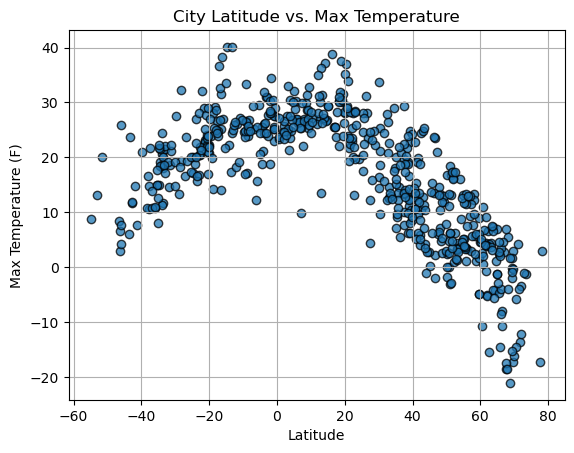

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

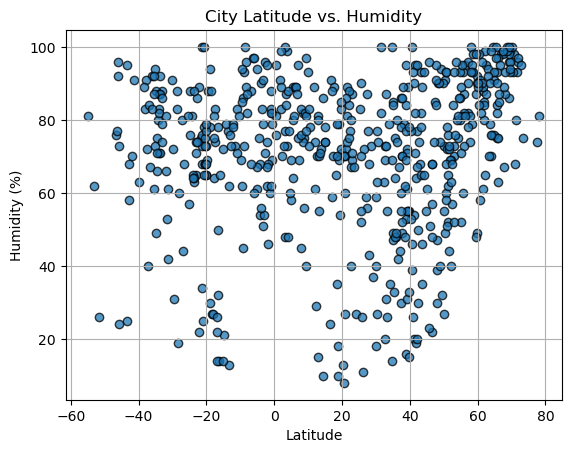

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

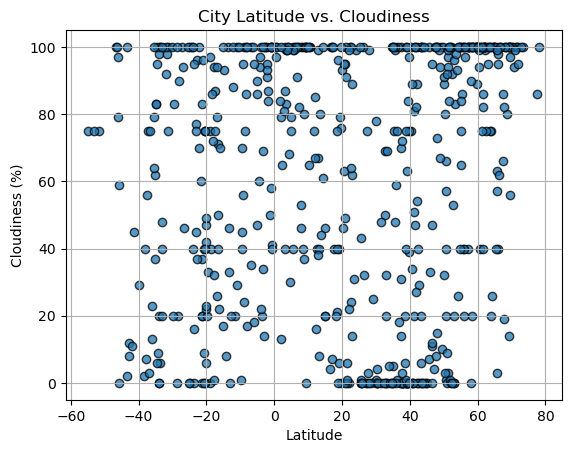

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

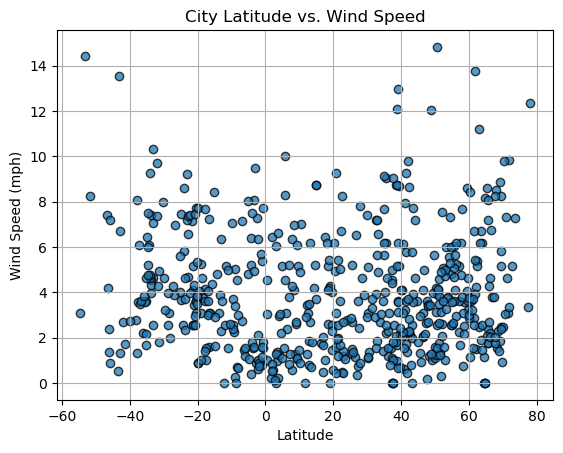

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, annotation_position):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create the linear regression equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    plt.annotate(line_eq, annotation_position, fontsize=15, color="red")

    # Set the title, xlabel, and ylabel
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print the r-value
    print(f"The r-value is: {rvalue**2}")

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434125


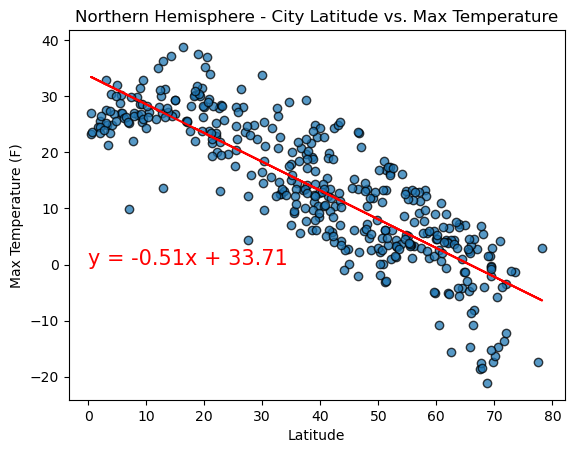

In [64]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere - City Latitude vs. Max Temperature", "Latitude", "Max Temperature (F)", (0, 0))
plt.show()

The r-value is: 0.4121057168607252


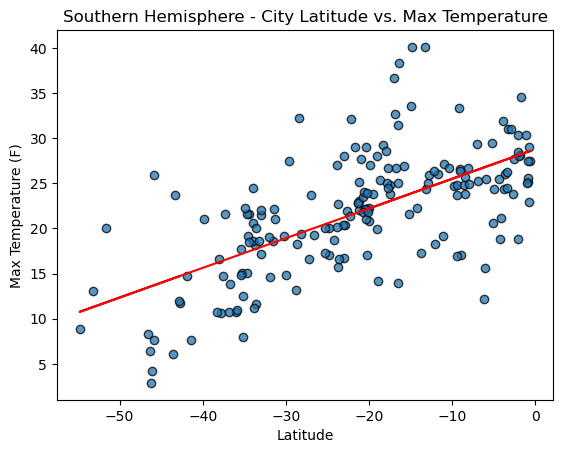

In [68]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere - City Latitude vs. Max Temperature", "Latitude", "Max Temperature (F)", (-25, 50))
plt.show()

**Discussion about the linear relationship: The Northern Hemisphere shows a negative linear relationship (i.e. as latitude increases, maximum temperature decreases), while the Southern Hemisphere shows a positive relationship (as latitude increases, maximum temperature also increases. ). 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789608


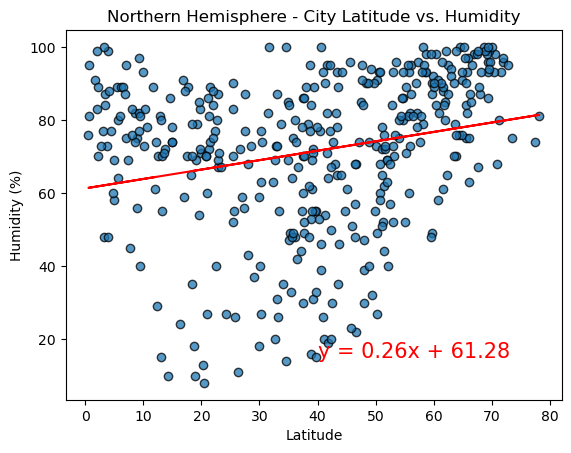

In [53]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern Hemisphere - City Latitude vs. Humidity", "Latitude", "Humidity (%)", (40, 15))
plt.show()

The r-value is: 0.0002808747046324618


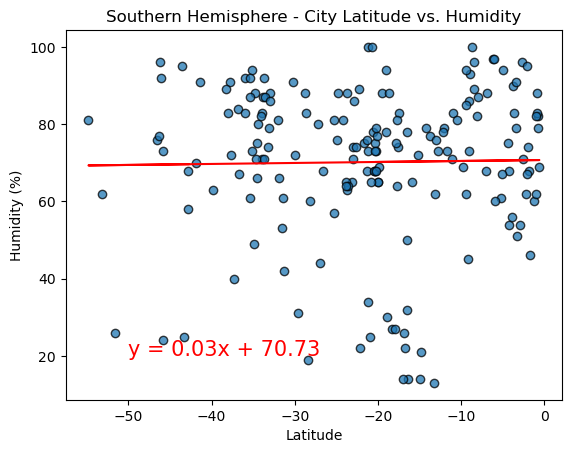

In [54]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern Hemisphere - City Latitude vs. Humidity", "Latitude", "Humidity (%)", (-50, 20))
plt.show()

**Discussion about the linear relationship:** The linear relationship for both northern and southern hemisphere are positive (i.e as latitude increases, humidity increases).  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811043


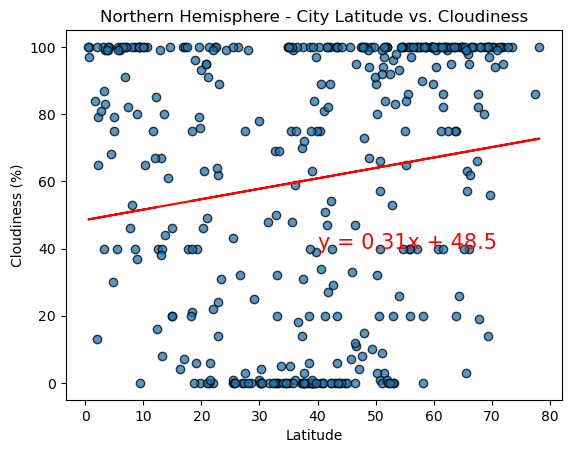

In [55]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere - City Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)", (40, 40))
plt.show()

The r-value is: 0.020567354299943663


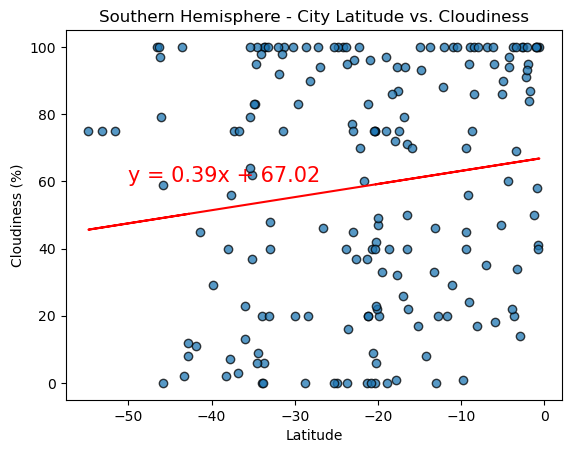

In [56]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere - City Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)", (-50, 60))
plt.show()

**Discussion about the linear relationship:** The linear relationship for both northern and southern hemisphere are positive (i.e as latitude increases, cloudiness increases).  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449484


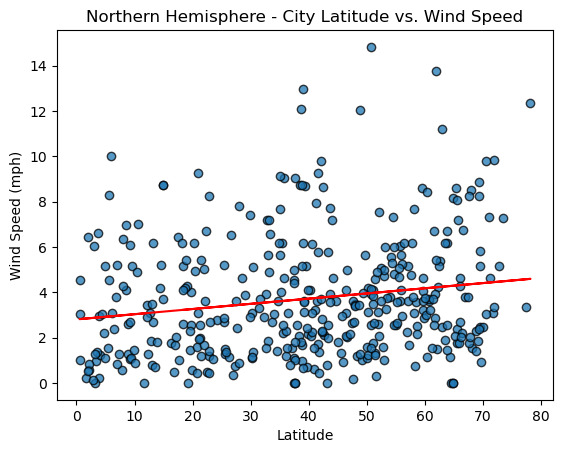

In [69]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere - City Latitude vs. Wind Speed", "Latitude", "Wind Speed (mph)", (40, 25))
plt.show()

The r-value is: 0.06223904070051575


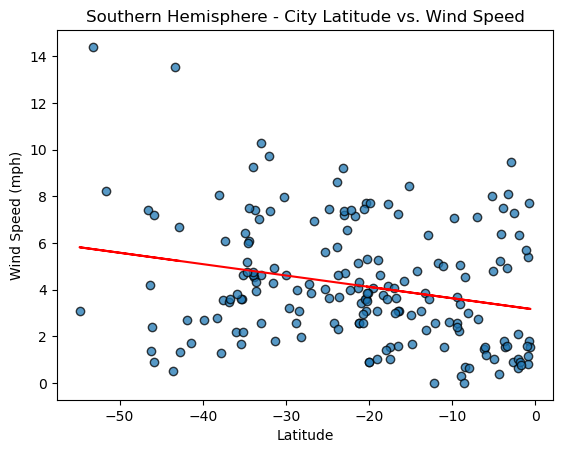

In [70]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere - City Latitude vs. Wind Speed", "Latitude", "Wind Speed (mph)", (-50, 20))
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere shows a positive linear relationship (i.e. as latitude increases, wind speed increases), while the Southern Hemisphere shows a negative relationship (as latitude increases, wind speed also decreases). 